## DSC 550 Week 4 Exercise 4.2 Scroggins Jonathon

### Categorizing the Daily Comments file

*I first used the method provided in the file "analyzing comments..." to categorize the Daily comments file given*

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('DailyComments.csv')
print(df)

  Day of Week                                        comments
0      Monday                             Hello, how are you?
1     Tuesday                            Today is a good day!
2   Wednesday  It's my birthday so it's a really special day!
3    Thursday       Today is neither a good day or a bad day!
4      Friday                           I'm having a bad day.
5    Saturday       There' s nothing special happening today.
6      Sunday                      Today is a SUPER good day!


In [3]:
corpus = df['comments']

In [4]:
vectorizer = CountVectorizer()

In [5]:
vectorized = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()

['are',
 'bad',
 'birthday',
 'day',
 'good',
 'happening',
 'having',
 'hello',
 'how',
 'is',
 'it',
 'my',
 'neither',
 'nothing',
 'or',
 'really',
 'so',
 'special',
 'super',
 'there',
 'today',
 'you']

In [6]:
vectorized.toarray()

array([[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]],
      dtype=int64)

In [7]:
df2 = pd.DataFrame({'text': corpus})

In [8]:
df2['positive1'] = df2.text.str.count('good')

In [9]:
df2['positive2'] = df2.text.str.count('special')

In [10]:
df2['negative'] = df2.text.str.count('bad')

In [11]:
df2['TotScore'] = df2.positive1 + df2.positive2 - df2.negative
df2

,text,positive1,positive2,negative,TotScore
0,"Hello, how are you?",0,0,0,0
1,Today is a good day!,1,0,0,1
2,It's my birthday so it's a really special day!,0,1,0,1
3,Today is neither a good day or a bad day!,1,0,1,0
4,I'm having a bad day.,0,0,1,-1
5,There' s nothing special happening today.,0,1,0,1
6,Today is a SUPER good day!,1,0,0,1


In [12]:
tot = df2['TotScore'].sum()

In [13]:
print('The overall score for the Daily Comments is {}'.format(tot))

The overall score for the Daily Comments is 3


### Using NLTK Vader

*I next decided to try and use the NLTK Vader method for the sentiment analysis*

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analzer = SentimentIntensityAnalyzer()

In [15]:
df['compound'] = [analzer.polarity_scores(v)['compound'] for v in df['comments']]

In [16]:
df['neg'] = [analzer.polarity_scores(v)['neg'] for v in df['comments']]

In [17]:
df['pos'] = [analzer.polarity_scores(v)['pos'] for v in df['comments']]

In [18]:
df['neu'] = [analzer.polarity_scores(v)['neu'] for v in df['comments']]

In [19]:
df

,Day of Week,comments,compound,neg,pos,neu
0,Monday,"Hello, how are you?",0.0000,0.000,0.000,1.000
1,Tuesday,Today is a good day!,0.4926,0.000,0.444,0.556
2,Wednesday,It's my birthday so it's a really special day!,0.5081,0.000,0.291,0.709
3,Thursday,Today is neither a good day or a bad day!,-0.7350,0.437,0.000,0.563
4,Friday,I'm having a bad day.,-0.5423,0.467,0.000,0.533
5,Saturday,There' s nothing special happening today.,-0.3089,0.311,0.000,0.689
6,Sunday,Today is a SUPER good day!,0.8327,0.000,0.662,0.338


In [63]:
df_positive = df[df['compound'] >= 0.05]
df_p = len(df_positive)
df_positive.head()

,Day of Week,comments,compound,neg,pos,neu
1,Tuesday,Today is a good day!,0.4926,0.0,0.444,0.556
2,Wednesday,It's my birthday so it's a really special day!,0.5081,0.0,0.291,0.709
6,Sunday,Today is a SUPER good day!,0.8327,0.0,0.662,0.338


In [64]:
df_neutral = df[(df['compound'] > -0.05) & (df['compound'] < 0.05)]
df_ne = len(df_neutral)
df_neutral.head()

,Day of Week,comments,compound,neg,pos,neu
0,Monday,"Hello, how are you?",0.0,0.0,0.0,1.0


In [65]:
df_negative = df[df['compound'] <= -0.05]
df_neg = len(df_negative)
df_negative.head()

,Day of Week,comments,compound,neg,pos,neu
3,Thursday,Today is neither a good day or a bad day!,-0.7350,0.437,0.0,0.563
4,Friday,I'm having a bad day.,-0.5423,0.467,0.0,0.533
5,Saturday,There' s nothing special happening today.,-0.3089,0.311,0.0,0.689


In [66]:
print('The amount of positive reviews in the Daily Comments data set is {}\nThe amount of negative reviews is {}\nThe amount of neutral reviews is {}'.format(df_p, df_neg, df_ne))

The amount of positive reviews in the Daily Comments data set is 3
The amount of negative reviews is 3
The amount of neutral reviews is 1


### A longer file using the basic method in word file provided

*I then decided to get a larger data set called DisneyLand reviews from Kaggle.com and test the method from the file as well*

In [20]:
disney = pd.read_csv('DisneylandReviews.csv')
disney.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [21]:
corpus2 = disney['Review_Text']

In [22]:
vectorizer2 = CountVectorizer()

In [23]:
vectorized2 = vectorizer2.fit_transform(corpus2)
vectorizer2.get_feature_names()

['00',
 '000',
 '0000',
 '000000',
 '0000hrs',
 '0000s',
 '000km',
 '000s',
 '000th',
 '0010',
 '005',
 '00a',
 '00am',
 '00and',
 '00e',
 '00euros',
 '00for',
 '00h',
 '00h30',
 '00h40',
 '00h45',
 '00hrs',
 '00if',
 '00in',
 '00p',
 '00pm',
 '00pmbeside',
 '00pp',
 '00us',
 '00usd',
 '00we',
 '01',
 '01am',
 '01pm',
 '01st',
 '02',
 '02m',
 '02mbig',
 '02mflying',
 '02mpeter',
 '03',
 '03914',
 '04',
 '04m',
 '04pm',
 '04th',
 '05',
 '05am',
 '05pm',
 '06',
 '0630',
 '0645',
 '06am',
 '07',
 '0700',
 '0700pm',
 '0710',
 '0730pm',
 '0734',
 '07am',
 '07m',
 '07mrc',
 '07stayed',
 '08',
 '080',
 '0800',
 '0800pm',
 '0830',
 '08pm',
 '08th',
 '09',
 '0900',
 '0900hrs',
 '0910',
 '0915',
 '0930',
 '0930hrs',
 '0945',
 '0946',
 '0958',
 '09h30',
 '0entrance',
 '0ne',
 '0ps',
 '0r',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '1000am',
 '1000get',
 '1000hk',
 '1000hrs',
 '1000m',
 '1000s',
 '1000us',
 '1000usd',
 '1005',
 '100aud',
 '100db',
 '100e',
 '100euro',
 '100euros',
 '100f',
 '1

In [24]:
vectorized2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
dis = pd.DataFrame({'text': corpus2})

In [26]:
dis['positive1'] = dis.text.str.count('good')

In [27]:
dis['positive2'] = dis.text.str.count('special')

In [28]:
dis['negative'] = dis.text.str.count('bad')

In [29]:
dis['TotScore'] = dis.positive1 + dis.positive2 - dis.negative
dis

,text,positive1,positive2,negative,TotScore
0,If you've ever been to Disneyland anywhere you...,0,0,0,0
1,Its been a while since d last time we visit HK...,0,1,0,1
2,Thanks God it wasn t too hot or too humid wh...,1,0,1,0
3,HK Disneyland is a great compact park. Unfortu...,0,0,0,0
4,"the location is not in the city, took around 1...",0,0,0,0
...,...,...,...,...,...
42651,i went to disneyland paris in july 03 and thou...,2,1,0,3
42652,2 adults and 1 child of 11 visited Disneyland ...,0,0,0,0
42653,My eleven year old daughter and myself went to...,1,0,0,1
42654,"This hotel, part of the Disneyland Paris compl...",0,0,0,0


In [30]:
tot_dis = dis['TotScore'].sum()

In [31]:
print('The overall score for the DisneyLand Reviews is {}'.format(tot_dis))

The overall score for the DisneyLand Reviews is 15499


*While this seems like a good method for doing a short set of comments that we can see the words specifically like in Daily Comments, I am not sure that it is the best method for a longer dataset like the one we have with the DIsneyland reviews. Especially since there might be other positive and negative words in the other reviews. Therefore I would like to try a VADER analysis and a regression analysis on a longer dataframe*

### Using VADER on DisneyLand Reviews

*Next I decided to use the NLTK Vader method on the DisneyLand reviews file*

In [32]:
disney['compound'] = [analzer.polarity_scores(v)['compound'] for v in disney['Review_Text']]

In [33]:
disney['pos'] = [analzer.polarity_scores(v)['pos'] for v in disney['Review_Text']]

In [34]:
disney['neg'] = [analzer.polarity_scores(v)['neg'] for v in disney['Review_Text']]

In [35]:
disney['neu'] = [analzer.polarity_scores(v)['neu'] for v in disney['Review_Text']]

In [36]:
disney.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,compound,pos,neg,neu
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,0.7069,0.109,0.000,0.891
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,0.9853,0.195,0.044,0.760
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,0.9920,0.220,0.022,0.758
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,0.8425,0.154,0.078,0.768
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,0.2846,0.098,0.000,0.902


In [37]:
disney_positive = disney[disney['compound'] >= 0.05]
amount_p = len(disney_positive)
disney_positive.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,compound,pos,neg,neu
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,0.7069,0.109,0.000,0.891
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,0.9853,0.195,0.044,0.760
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,0.9920,0.220,0.022,0.758
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,0.8425,0.154,0.078,0.768
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,0.2846,0.098,0.000,0.902


array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

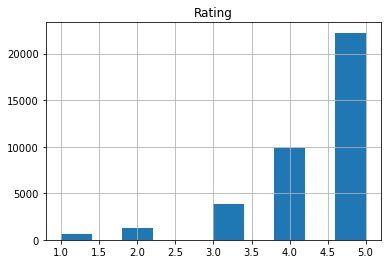

In [38]:
disney_positive.hist('Rating')

In [39]:
disney_neutral = disney[(disney['compound'] > -0.05) & (disney['compound'] < 0.05)]
amount_ne = len(disney_neutral)
disney_neutral.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,compound,pos,neg,neu
38,668209978,5,2018-9,Australia,You have to visit to understand the memorable ...,Disneyland_HongKong,0.0000,0.000,0.000,1.000
216,651195099,3,2018-8,United Kingdom,Very small Disneyland compared to the other co...,Disneyland_HongKong,-0.0090,0.187,0.188,0.625
292,646128887,5,2018-12,United States,December is really a different kind of ambianc...,Disneyland_HongKong,0.0000,0.000,0.000,1.000
398,639544170,3,2018-12,Canada,"Lot of constructions on the way, tones of visi...",Disneyland_HongKong,0.0000,0.000,0.000,1.000
470,634641453,3,2018-11,United States,"Being from FL we had to check it out, sadly I ...",Disneyland_HongKong,0.0258,0.109,0.105,0.787


array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

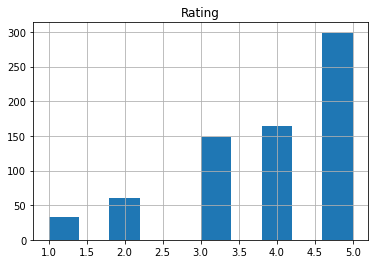

In [40]:
disney_neutral.hist('Rating')

In [41]:
disney_negative = disney[disney['compound'] <= -0.05]
amount_neg = len(disney_negative)
disney_negative.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,compound,pos,neg,neu
12,670376905,4,2019-4,Australia,"We spend two days, the second day went early t...",Disneyland_HongKong,-0.7789,0.023,0.118,0.859
25,669548161,3,2019-4,Hong Kong,Disneylands the world over are generic apart f...,Disneyland_HongKong,-0.1779,0.100,0.115,0.784
28,669353396,5,2019-4,United Kingdom,We visited here on a Wednesday. We arrived for...,Disneyland_HongKong,-0.5574,0.000,0.075,0.925
29,669186152,3,2019-4,Australia,I need to say I have been to home of Disney...,Disneyland_HongKong,-0.8561,0.044,0.079,0.877
71,665723381,4,2019-4,United Kingdom,During a recent stop over in Hong Kong we paid...,Disneyland_HongKong,-0.7430,0.032,0.083,0.885


array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

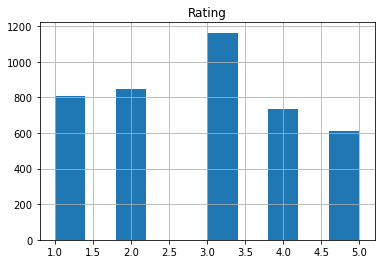

In [42]:
disney_negative.hist('Rating')

In [67]:
print('The amount of positive reviews in the Disneyland Reviews data set is {}\nThe amount of negative reviews is {}\nThe amount of neutral reviews is {}'.format(amount_p, amount_neg, amount_ne))

The amount of positive reviews in the Disneyland Reviews data set is 37785
The amount of negative reviews is 4166
The amount of neutral reviews is 705


*Out of curiosity, I also looked at the histograms of the ratings in the different subsets of what the VADER analysis would consider positive, negative or neutral. I found it interesting that the histograms line up well with the sentiment analysis. Most of the ones that VADER deemed positive were rated mostly high, neutral were pretty even and the negative ones are fairly skewed toward the lower end. I think that shows the VADER analysis is fairly accurate for this dataset.*

### Regression analysis on larger dataset

*I also wanted to see if I could use a method I found for a regression analysis on the larger dataset as well*

In [44]:
import re
import nltk
import matplotlib as plt
import seaborn as sns

In [45]:
disney.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,compound,pos,neg,neu
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,0.7069,0.109,0.000,0.891
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,0.9853,0.195,0.044,0.760
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,0.9920,0.220,0.022,0.758
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,0.8425,0.154,0.078,0.768
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,0.2846,0.098,0.000,0.902


array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

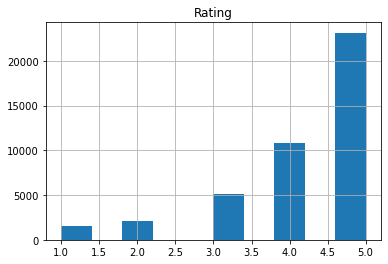

In [46]:
disney.hist('Rating')

In [47]:
from nltk.corpus import stopwords

In [48]:
disney = disney[disney['Rating'] != 3]
disney["sentiment"] = disney['Rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [49]:
disney.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,compound,pos,neg,neu,sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,0.7069,0.109,0.000,0.891,1
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,0.9853,0.195,0.044,0.760,1
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,0.9920,0.220,0.022,0.758,1
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,0.8425,0.154,0.078,0.768,1
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,0.2846,0.098,0.000,0.902,1


In [50]:
positive = disney[disney['sentiment'] == 1]
negative = disney[disney['sentiment'] == -1]

In [51]:
def remove_punctuation(text):
    final = ''.join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final

In [52]:
disney['Review_Text'] = disney['Review_Text'].apply(remove_punctuation)

In [53]:
disney_new = disney[['Review_Text', 'sentiment']]
disney_new.head()

,Review_Text,sentiment
0,If you've ever been to Disneyland anywhere you...,1
1,Its been a while since d last time we visit HK...,1
2,Thanks God it wasn t too hot or too humid wh...,1
3,HK Disneyland is a great compact park Unfortun...,1
4,"the location is not in the city, took around 1...",1


In [54]:
index = disney.index
disney['random_number'] = np.random.randn(len(index))

train = disney[disney['random_number'] <= 0.8]
test = disney[disney['random_number'] > 0.8]

In [55]:
dis_vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = dis_vectorizer.fit_transform(train['Review_Text'])
test_matrix = dis_vectorizer.transform(test['Review_Text'])

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)

In [57]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [58]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [59]:
predictions = lr.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
new = np.asarray(y_test)
confusion_matrix(predictions, y_test)

array([[ 574,  135],
       [ 225, 7256]], dtype=int64)

In [62]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

          -1       0.72      0.81      0.76       709
           1       0.98      0.97      0.98      7481

    accuracy                           0.96      8190
   macro avg       0.85      0.89      0.87      8190
weighted avg       0.96      0.96      0.96      8190



*The model has an overall accuracy of about 96%*